In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import sklearn
import matplotlib.pyplot as plt
from sklearn import preprocessing
import random
from scipy.spatial import distance

## 2. Grouping songs together!

### 2.1 Getting your data!

In [3]:
echonest = pd.read_csv('echonest.csv', encoding='utf8')
features = pd.read_csv('features.csv')
tracks = pd.read_csv('tracks.csv')

In [2]:
#print(echonest.columns[:-224])

In [4]:
print(echonest.shape)
print(features.shape)
print(tracks.shape)

(13129, 250)
(106574, 519)
(106574, 53)


In [5]:
#print(sum('title' in col for col in echonest.columns))
#print(sum('title' in col for col in features.columns))
#print(sum('title' in col for col in  tracks.columns))

In [80]:
# Merge the dataset in order to have information about echonest track (left merge - index of echonest)
# We merge with the key = 'track_id'
merged_df = pd.merge(pd.merge(echonest, features, on='track_id', how='left'), tracks, on='track_id', how='left')
# We store the merged dataset to avoid to compute it each time
merged_df.to_csv('merged_df.csv')

In [90]:
merged_df.describe()

,track_id,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_instrumentalness,audio_features_liveness,audio_features_speechiness,audio_features_tempo,audio_features_valence,metadata_artist_latitude,...,artist_id,artist_latitude,artist_longitude,track_bit_rate,track_comments,track_duration,track_favorites,track_interest,track_listens,track_number
count,13129.000000,1.312900e+04,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,13129.000000,9770.000000,...,13129.000000,8052.000000,8052.000000,13129.000000,13129.000000,13129.000000,13129.000000,1.312900e+04,13129.000000,13129.000000
mean,34031.058268,5.246876e-01,0.487290,0.537516,0.640536,0.187804,0.099174,123.080061,0.439761,39.961892,...,6303.865641,40.144635,-49.099826,248580.807068,0.044558,249.013558,4.310305,3.784447e+03,2147.068703,5.608500
std,28950.422182,3.837186e-01,0.190148,0.278049,0.361430,0.158051,0.137381,35.015137,0.276028,15.554275,...,4974.103114,15.603089,57.881761,63834.230395,0.494095,207.268166,20.884705,3.396744e+04,9434.471644,6.108004
min,2.000000,9.035000e-07,0.051307,0.000020,0.000000,0.025297,0.022324,12.753000,0.000010,-45.867100,...,1.000000,-43.532054,-123.114034,-1.000000,0.000000,18.000000,0.000000,6.300000e+01,12.000000,0.000000
25%,12986.000000,1.037726e-01,0.344759,0.321300,0.323466,0.101406,0.036932,95.967000,0.197321,37.784827,...,2203.000000,37.871166,-85.111004,192000.000000,0.000000,156.000000,0.000000,6.700000e+02,299.000000,2.000000
50%,28097.000000,5.739848e-01,0.485635,0.549113,0.838134,0.119002,0.049019,120.057000,0.417743,40.781400,...,5442.000000,40.714550,-73.950000,256000.000000,0.000000,214.000000,1.000000,1.351000e+03,694.000000,4.000000
75%,45021.000000,9.207270e-01,0.629094,0.776254,0.918244,0.211041,0.085452,145.318000,0.665575,47.254575,...,9288.000000,47.218371,-0.045680,320000.000000,0.000000,282.000000,4.000000,2.948000e+03,1714.000000,8.000000
max,124911.000000,9.957965e-01,0.968645,0.999964,0.998016,0.980330,0.966177,251.072000,0.999990,68.927500,...,20818.000000,65.201935,174.885971,448000.000000,37.000000,3033.000000,1482.000000,3.293557e+06,543252.000000,213.000000


In [66]:
merged_df.iloc[:, :100].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13129 entries, 0 to 13128
Data columns (total 100 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          13129 non-null  int64  
 1   track_id                            13129 non-null  int64  
 2   audio_features_acousticness         13129 non-null  float64
 3   audio_features_danceability         13129 non-null  float64
 4   audio_features_energy               13129 non-null  float64
 5   audio_features_instrumentalness     13129 non-null  float64
 6   audio_features_liveness             13129 non-null  float64
 7   audio_features_speechiness          13129 non-null  float64
 8   audio_features_tempo                13129 non-null  float64
 9   audio_features_valence              13129 non-null  float64
 10  metadata_album_date                 2717 non-null   object 
 11  metadata_album_name                 2872

In [6]:
# to avoid to merge each time
merged_df = pd.read_csv('merged_df.csv')

C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (811,816,818) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
print(len(merged_df['track_title']))
print(len(merged_df['track_title'].unique()))

13129
12682


### 2.2 Choose your features (variables)!

In [123]:
#drop columns with too few values ???

L=[]
for col in merged_df.columns:
    nb_missed = merged_df[col].isna().sum() 
    n = merged_df.shape[0]
    if nb_missed > 5000 :
        L.append(col)


In [124]:
print(len(L))
print(len(merged_df.columns))
print(L)

23
820
['metadata_album_date', 'metadata_album_name', 'ranks_artist_discovery_rank', 'ranks_artist_familiarity_rank', 'ranks_artist_hotttnesss_rank', 'ranks_song_currency_rank', 'ranks_song_hotttnesss_rank', 'album_engineer', 'album_producer', 'artist_active_year_begin', 'artist_active_year_end', 'artist_associated_labels', 'artist_latitude', 'artist_longitude', 'artist_members', 'artist_related_projects', 'artist_wikipedia_page', 'track_composer', 'track_date_recorded', 'track_information', 'track_language_code', 'track_lyricist', 'track_publisher']


In [129]:
d= merged_df[['metadata_album_date', 'metadata_album_name', 'ranks_artist_discovery_rank', 'ranks_artist_familiarity_rank', 'ranks_artist_hotttnesss_rank', 'ranks_song_currency_rank', 'ranks_song_hotttnesss_rank', 'album_engineer', 'album_producer', 'artist_active_year_begin', 'artist_active_year_end', 'artist_associated_labels', 'artist_latitude', 'artist_longitude', 'artist_members', 'artist_related_projects', 'artist_wikipedia_page', 'track_composer', 'track_date_recorded', 'track_information', 'track_language_code', 'track_lyricist', 'track_publisher']]
d.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 0 to 13128
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   metadata_album_date            2717 non-null   object 
 1   metadata_album_name            2872 non-null   object 
 2   ranks_artist_discovery_rank    2825 non-null   float64
 3   ranks_artist_familiarity_rank  2825 non-null   float64
 4   ranks_artist_hotttnesss_rank   2824 non-null   float64
 5   ranks_song_currency_rank       2033 non-null   float64
 6   ranks_song_hotttnesss_rank     2206 non-null   float64
 7   album_engineer                 2903 non-null   object 
 8   album_producer                 2945 non-null   object 
 9   artist_active_year_begin       3048 non-null   object 
 10  artist_active_year_end         494 non-null    object 
 11  artist_associated_labels       2257 non-null   object 
 12  artist_latitude                8052 non-null  

In [10]:
print(merged_df['metadata_album_name'].isna().sum())
print(merged_df['album_title'].isna().sum())

10257
0


In [ ]:
#add mean value in columns with a few NAN

In [152]:
merged_df[['metadata_artist_latitude']].info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 0 to 13128
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   metadata_artist_latitude  9770 non-null   float64
dtypes: float64(1)
memory usage: 205.1 KB


In [11]:
#encoded value
encoded_df = merged_df.copy()
le = preprocessing.LabelEncoder()

for col in encoded_df.columns:
    
    #columns with non-numeric values
    if encoded_df[col].dtype == object :
        #replace missing values by 'None'
        encoded_df[col].fillna("None", inplace = True)  
        le = preprocessing.LabelEncoder()
        encoded_df[col]= le.fit_transform(encoded_df[col])
    elif encoded_df[col].dtype == int:
        #replace missing values by 0
        encoded_df[col].fillna(0, inplace = True)
    else : 
        #replace missing values by 0.
        encoded_df[col].fillna(0., inplace = True)

In [12]:
encoded_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13129 entries, 0 to 13128
Data columns (total 821 columns):
 #    Column                              Dtype  
---   ------                              -----  
 0    Unnamed: 0                          int64  
 1    track_id                            int64  
 2    audio_features_acousticness         float64
 3    audio_features_danceability         float64
 4    audio_features_energy               float64
 5    audio_features_instrumentalness     float64
 6    audio_features_liveness             float64
 7    audio_features_speechiness          float64
 8    audio_features_tempo                float64
 9    audio_features_valence              float64
 10   metadata_album_date                 int32  
 11   metadata_album_name                 int32  
 12   metadata_artist_latitude            float64
 13   metadata_artist_location            int32  
 14   metadata_artist_longitude           float64
 15   metadata_artist_name              

In [67]:
#normalize for ACP
X = encoded_df.to_numpy()
Z = preprocessing.StandardScaler().fit_transform(X) # normalize

#Do ACP
from sklearn.decomposition import PCA

#pca = PCA(n_components=Z.shape[1])
pca = PCA(n_components=800)
A = pca.fit_transform(Z)

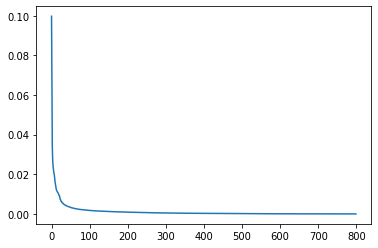

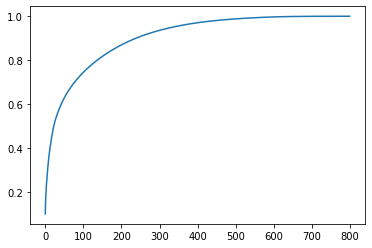

[0.0997425  0.17057147 0.20444179 0.23171528 0.25572856 0.27814388
 0.29902763 0.31911342 0.33766152 0.35413507 0.36929215 0.38290158
 0.39577737 0.40777368 0.41940258 0.4306088  0.4413842  0.45191122
 0.46225374 0.47195061 0.48125292 0.4903361  0.49824508 0.50549371
 0.51253935 0.51891485 0.52503365 0.53112643 0.53672591 0.54219432
 0.54757531 0.55260013 0.55749212 0.56231922 0.56699665 0.57160356
 0.57599588 0.58031049 0.58454559 0.58872276 0.59276512 0.59667741
 0.60050929 0.60431656 0.60801397 0.61167235 0.61525882 0.61876431
 0.6221978  0.62559948 0.62895389 0.63214317 0.63528377 0.63837387
 0.64140305 0.64439737 0.64733862 0.65024389 0.65308729 0.65590156
 0.65862777 0.66131908 0.66398799 0.66662994 0.66922304 0.67179231
 0.67435185 0.67685535 0.67932779 0.68177353 0.6841831  0.68654864
 0.68887911 0.69118366 0.69345229 0.69569957 0.69790129 0.70008362
 0.70225737 0.70441195 0.70655006 0.70867224 0.71076636 0.71282307
 0.71486339 0.71686683 0.71885318 0.72080818 0.72275586 0.7246

In [68]:
#plt.hist(pca.explained_variance_ratio_, bins=len(pca.explained_variance_ratio_))
plt.plot(pca.explained_variance_ratio_)
plt.show()

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

#print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))

### 2.3 Clustering!

In [133]:
"""
def KMeans(X, k, max_it = 100):
    #choose randomly points of X to initialize our centroids
    ind_centroids = random.sample(range(len(X)),k)
    #initialization of the centroids
    centroids = X[ind_centroids, :]
    #init the associated cluster for each point
    previous_clusters = [np.array([-1 for i in range(len(X))])]
    clusters = np.array([-1 for i in range(len(X))])
    for i,x in zip(range(len(X)),X) :
        clusters[i] = np.argmin(np.array([distance.euclidean(x, c) for c in centroids]))
    
    count = 0
    while (clusters != previous_clusters[-1]).any() and count <= max_it:
        previous_clusters.append(clusters)
        # update the centroids
        for j in range(k):
            centroids[j] = np.mean(X[clusters==j,:], axis=0)
        # re-init the clusters
        clusters = np.array([-1 for i in range(len(X))])
        for i,x in zip(range(len(X)),X) :
            clusters[i] = np.argmin(np.array([distance.euclidean(x, c) for c in centroids]))
        count+=1
        
    return clusters, centroids, count
"""

In [15]:
def KMeans(X, k, max_it = 100):
    #choose randomly points of X to initialize our centroids
    ind_centroids = random.sample(range(len(X)),k)
    #initialization of the centroids
    centroids = X[ind_centroids, :]
    #init the associated cluster for each point
    previous_clusters = [np.full(len(X), -1)]
    clusters = np.full(len(X), -1)
    
    distances = np.array([np.linalg.norm(X - centroids[i], axis = 1) for i in range(k)]).T
    clusters = np.argmin(distances, axis = 1)
    count = 0
    while (clusters != previous_clusters[-1]).any() and (count <= max_it):
        previous_clusters.append(clusters)
        # update the centroids
        for j in range(k):
            centroids[j] = np.mean(X[clusters==j,:], axis=0)
        distances = np.array([np.linalg.norm(X - centroids[i], axis = 1) for i in range(k)]).T
        clusters = np.argmin(distances, axis = 1)
        count+=1
        
    return clusters, centroids, count

In [16]:
random.seed(0)
%time KMeans(X, 3, max_it = 100)
%time KMeans(Z, 3, max_it = 100)

Wall time: 6.56 s
Wall time: 13.4 s


(array([1, 1, 1, ..., 0, 1, 2], dtype=int64),
 array([[-0.04614875, -0.03206659, -0.19695269, ..., -0.02104922,
          0.10876551, -0.00913603],
        [ 0.08554367,  0.06287004, -0.41368644, ...,  0.00215615,
         -0.02713512,  0.02942749],
        [-0.06197776, -0.04813519,  0.88663482, ...,  0.02621842,
         -0.11183427, -0.03073555]]),
 24)

#### Method to find an optimal number of clusters
1. Elbow method

In [17]:
def compute_elbow(X, cluster_labels, centroids):
    C = np.array([centroids[k] for k in cluster_labels])
    dist = np.linalg.norm(X-C, axis = 1)
    S = np.sum(dist)
    return S

In [18]:
def elbow_method(X, k_min, k_max):
    inertia = []
    K = []
    for k in range(k_min, k_max + 1):
        cluster_labels, centroids, count  = KMeans(X,k)
        S = compute_elbow(X, cluster_labels, centroids)
        inertia.append(S)
        K.append(k)
        print(k)
    plt.plot(K, inertia)
    plt.show()
    return K, inertia

In [23]:
Z.shape

(13129, 821)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


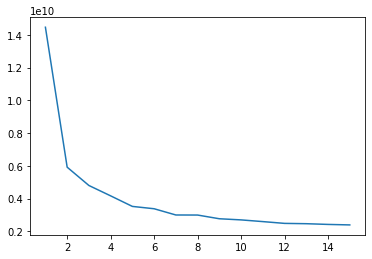

In [24]:
K, inertia = elbow_method(X, 1, 15)

2. Silhouette score

Silhouette Score = (b-a)/max(a,b)

where

a= average intra-cluster distance i.e the average distance between each point within a cluster.

b= average inter-cluster distance i.e the average distance between all clusters.

In [22]:
def silhouette_score(X, cluster_labels, centroids):
    C = np.array([centroids[k] for k in cluster_labels])
    
    #Compute the average of distances between each point and its centroid
    dist = np.linalg.norm(X-C, axis = 1)
    intra_cluster = np.mean(dist)
    
    #Compute the average of distances between each centroid
    L=[]
    for i in range(len(centroids)) : 
        c1 = centroids[i]
        for j in range(i+1, len(centroids)) : # avoid to compute the distance twice
            c2 = centroids[j]
            if (c1 != c2).any() :
                L.append(np.linalg.norm(c1-c2))
    inter_cluster = np.mean(np.array(L))
    
    silhouette_score = (inter_cluster - intra_cluster) / max(intra_cluster, inter_cluster)
    return silhouette_score
    

In [24]:
clusters, centroids, count = KMeans(X, 5)

In [25]:
silhouette_score(X, clusters, centroids)

0.9282750024275733

In [26]:
def silhouette_method(X, k_min, k_max):
    silhouette_scores = []
    K = []
    for k in range(k_min, k_max + 1):
        cluster_labels, centroids, count  = KMeans(X,k)
        S = silhouette_score(X, cluster_labels, centroids)
        silhouette_scores.append(S)
        K.append(k)
        print(k)
    plt.plot(K, silhouette_scores)
    plt.show()
    return K, silhouette_scores

C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


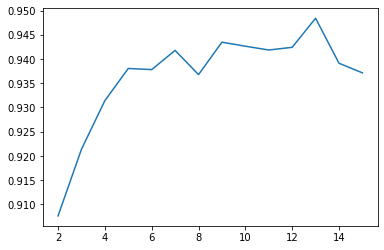

In [27]:
K, silhouette_scores = silhouette_method(X, 1, 15)

On Z, normalized data

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


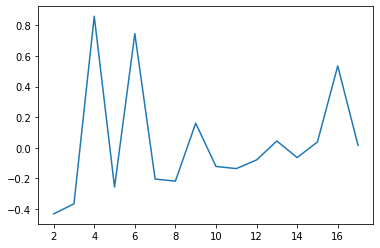

In [28]:
K, silhouette_scores = silhouette_method(Z, 1, 17)

On A, reduced data with ACP

In [56]:
#normalize for ACP
X = encoded_df.to_numpy()
Z = preprocessing.StandardScaler().fit_transform(X) # normalize

#Do ACP
from sklearn.decomposition import PCA

#pca = PCA(n_components=Z.shape[1])
pca = PCA(n_components=80)
A = pca.fit_transform(Z)

In [57]:
A.shape

(13129, 80)

In [58]:
A[:,5].mean()

-3.117317509313868e-16

C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


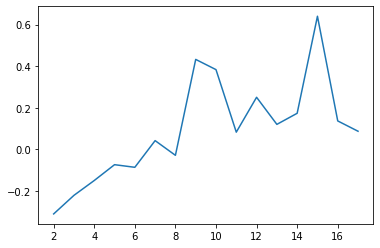

In [59]:
K_A, silhouette_scores_A = silhouette_method(A, 1, 17)

In [60]:
#normalize for ACP
X = encoded_df.to_numpy()
Z = preprocessing.StandardScaler().fit_transform(X) # normalize

#Do ACP
from sklearn.decomposition import PCA

#pca = PCA(n_components=Z.shape[1])
pca = PCA(n_components=100)
A = pca.fit_transform(Z)

C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\aurel\Downloads\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


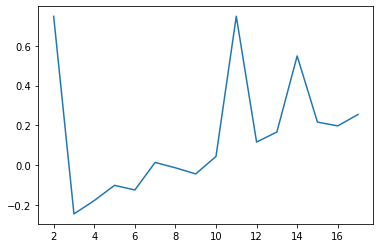

In [61]:
K_A, silhouette_scores_A = silhouette_method(A, 1, 17)

In [28]:
for col in merged_df.columns:
    if 'genre' in col :
        print(col)

track_genre_top
track_genres
track_genres_all


In [30]:
merged_df[['track_genre_top', 'track_genres','track_genres_all']]

,track_genre_top,track_genres,track_genres_all
0,Hip-Hop,[21],[21]
1,Hip-Hop,[21],[21]
2,Hip-Hop,[21],[21]
3,Pop,[10],[10]
4,Hip-Hop,[21],[21]
...,...,...,...
13124,NaN,"[286, 542]","[542, 21, 286, 15]"
13125,NaN,"[286, 542]","[542, 21, 286, 15]"
13126,NaN,"[286, 542]","[542, 21, 286, 15]"
13127,NaN,"[286, 542]","[542, 21, 286, 15]"


In [65]:
merged_df[['track_genre_top', 'track_genres','track_genres_all']]

,track_genre_top,track_genres,track_genres_all
0,Hip-Hop,[21],[21]
1,Hip-Hop,[21],[21]
2,Hip-Hop,[21],[21]
3,Pop,[10],[10]
4,Hip-Hop,[21],[21]
...,...,...,...
13124,NaN,"[286, 542]","[542, 21, 286, 15]"
13125,NaN,"[286, 542]","[542, 21, 286, 15]"
13126,NaN,"[286, 542]","[542, 21, 286, 15]"
13127,NaN,"[286, 542]","[542, 21, 286, 15]"


In [64]:
len(merged_df['track_genre_top'].unique())

13

## 3. Algorithmic questions

In [10]:
def pairs(A,s):
    res=[]
    for i in range(len(A)):
        for j in range(i+1, len(A)):
            if A[i]+A[j] == s:
                res.append((A[i],A[j]))
    return res

In [11]:
A = [7, -2, 8, 2, 6, 4, -7, 2, 1, 3, -3] 
s = 4

print(*pairs(A,s))

(7, -3) (-2, 6) (2, 2) (1, 3)


In [ ]:
#add comments about complexity and ideas